In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from seagul.plot import smooth_bounded_curve
import brax.training.apg as algo
from IPython.display import HTML, clear_output
import jax

from brax.io import html, model
from brax.envs import create_fn

def visualize(sys, qps, height=480):
  """Renders a 3D visualization of the environment."""
  return HTML(html.render(sys, qps, height=height))

save_dir = "./save_bapg_6"


-3485.388671875 +- 819.9329833984375
-1495.4615478515625 +- 59.1536979675293


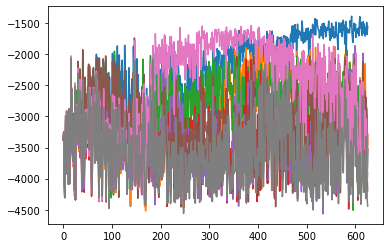

<Figure size 432x288 with 0 Axes>

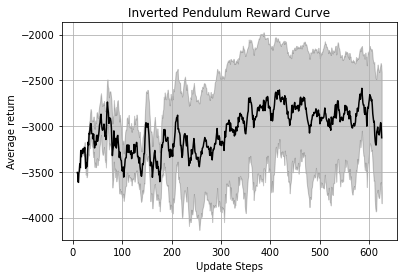

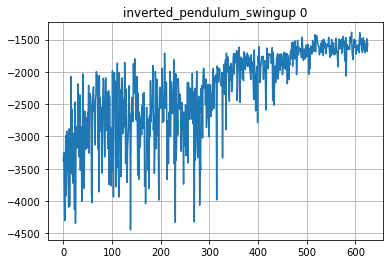

In [2]:
env_save_name = "inverted_pendulum_swingup"
env_display_name = "Inverted Pendulum"
reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()

reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{reward_arr[-1,:].mean()} +- {reward_arr[-1,:].std()}")


# == 

env_name = env_save_name
seed = np.argmax(reward_arr[-1,:])

env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
env = env_fn()
rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{seed}", 'rb'))

plt.figure()
plt.plot(rewards)
plt.grid()
plt.title(f"{env_name} {seed}")

inference_fn = algo.make_inference_fn(
    env.observation_size, env.action_size, True)
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")

jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

reward_sums = []
for seed in range(10):
    rollout = []
    rng = jax.random.PRNGKey(seed=seed)
    state = jit_env_reset(rng=rng)

    while not state.done:
      rng, _ = jax.random.split(rng)
      rollout.append(state)
      act = jit_inference_fn(params, state.obs, rng)
      state = jit_env_step(state, act)

    rewards = [s.reward for s in rollout]
    reward_sums.append(sum(rewards))
    
    
print(f"{np.mean(reward_sums)} +- {np.std(reward_sums)}")
rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)

while not state.done:
  rng, _ = jax.random.split(rng)
  rollout.append(state)
  act = jit_inference_fn(params, state.obs, rng)
  state = jit_env_step(state, act)

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

HTML(html.render(env.sys, [s.qp for s in rollout]))




-1982.67724609375 +- 4056.084228515625
-4206.2685546875 +- 4848.9716796875


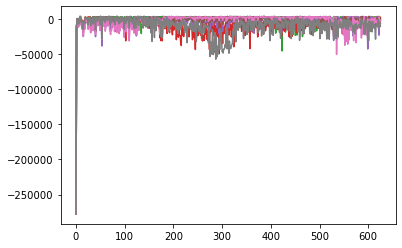

<Figure size 432x288 with 0 Axes>

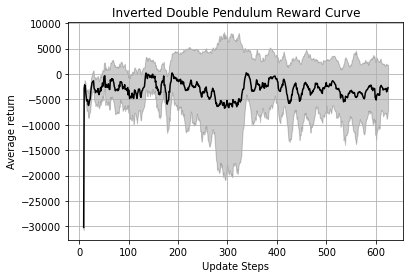

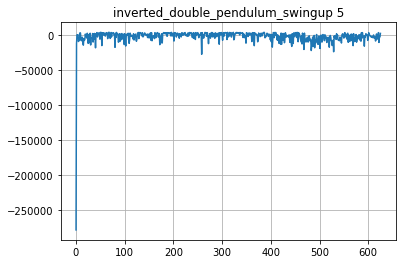

In [3]:
env_save_name = "inverted_double_pendulum_swingup"
env_display_name = "Inverted Double Pendulum"

reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()

reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{reward_arr[-1,:].mean()} +- {reward_arr[-1,:].std()}")


# == 

env_name = env_save_name
seed = np.argmax(reward_arr[-1,:])

env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
env = env_fn()
rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{seed}", 'rb'))

plt.figure()
plt.plot(rewards)
plt.grid()
plt.title(f"{env_name} {seed}")

inference_fn = algo.make_inference_fn(
    env.observation_size, env.action_size, True)
params = model.load_params(f"{save_dir}/{env_name}_params_{seed}")

jit_env_reset = jax.jit(env.reset)
jit_env_step = jax.jit(env.step)
jit_inference_fn = jax.jit(inference_fn)

reward_sums = []
for seed in range(10):
    rollout = []
    rng = jax.random.PRNGKey(seed=seed)
    state = jit_env_reset(rng=rng)

    while not state.done:
      rng, _ = jax.random.split(rng)
      rollout.append(state)
      act = jit_inference_fn(params, state.obs, rng)
      state = jit_env_step(state, act)

    rewards = [s.reward for s in rollout]
    reward_sums.append(sum(rewards))
    
    
print(f"{np.mean(reward_sums)} +- {np.std(reward_sums)}")
rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)

while not state.done:
  rng, _ = jax.random.split(rng)
  rollout.append(state)
  act = jit_inference_fn(params, state.obs, rng)
  state = jit_env_step(state, act)

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

HTML(html.render(env.sys, [s.qp for s in rollout]))

1949.985107421875 +- 814.1206665039062
6: 2778.462158203125 +- 89.42821502685547


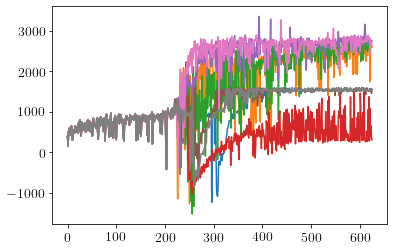

<Figure size 432x288 with 0 Axes>

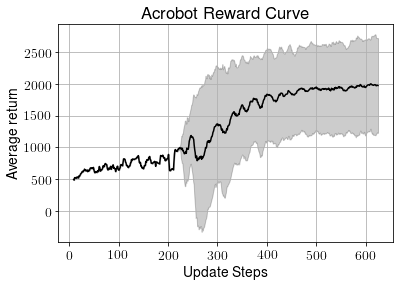

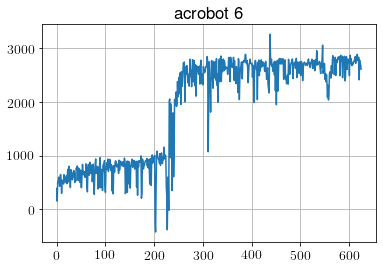

In [25]:
env_save_name = "acrobot"
env_display_name = "Acrobot"

reward_list = []
for i in range(8):
    reward_list.append(pickle.load(open(f"./{save_dir}/{env_save_name}_rewards.pkl{i}", 'rb')))
    
for r in reward_list:
    plt.plot(r)
    
plt.figure()

reward_arr = np.array(reward_list).T

fig, ax = smooth_bounded_curve(reward_arr,
                               lower_bound_fn = lambda x: np.mean(x)-np.std(x), 
                               upper_bound_fn = lambda x: np.mean(x)+np.std(x), 
                               window=10, 
                               color='k')
ax.grid()
ax.set_title(f"{env_display_name} Reward Curve")

print(f"{reward_arr[-1,:].mean()} +- {reward_arr[-1,:].std()}")


# == 

env_name = env_save_name
for policy_seed in [6]:
#np.argmax(reward_arr[-1,:])

    env_fn = create_fn(env_name = env_name, episode_length=500, action_repeat=1, batch_size=None, auto_reset=False)
    env = env_fn()
    rewards = pickle.load(open(f"{save_dir}/{env_name}_rewards.pkl{policy_seed}", 'rb'))

    plt.figure()
    plt.plot(rewards)
    plt.grid()
    plt.title(f"{env_name} {policy_seed}")

    inference_fn = algo.make_inference_fn(
        env.observation_size, env.action_size, True)
    params = model.load_params(f"{save_dir}/{env_name}_params_{policy_seed}")

    jit_env_reset = jax.jit(env.reset)
    jit_env_step = jax.jit(env.step)
    jit_inference_fn = jax.jit(inference_fn)

    reward_sums = []
    for seed in range(10):
        rollout = []
        rng = jax.random.PRNGKey(seed=seed)
        state = jit_env_reset(rng=rng)

        while not state.done:
          rng, sample_rng = jax.random.split(rng)
          rollout.append(state)
          act = jit_inference_fn(params, state.obs, sample_rng)
          state = jit_env_step(state, act)

        rewards = [s.reward for s in rollout]
        reward_sums.append(sum(rewards))


    print(f"{policy_seed}: {np.mean(reward_sums)} +- {np.std(reward_sums)}")


Text(0.5, 1.0, 'Acrobot Rollout Vanilla APG')

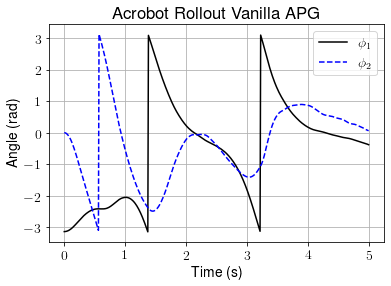

In [26]:
rollout = []
rng = jax.random.PRNGKey(seed=0)
state = jit_env_reset(rng=rng)

while not state.done:
  rng, _ = jax.random.split(rng)
  rollout.append(state)
  act = jit_inference_fn(params, state.obs, rng)
  state = jit_env_step(state, act)

rewards = [s.reward for s in rollout]
reward_sums.append(sum(rewards))

HTML(html.render(env.sys, [s.qp for s in rollout]))


obs = [s.obs for s in rollout]
pos = np.array(obs)[:,:2]
t = [i*0.01 for i in range(pos.shape[0])]
plt.rcParams['text.usetex'] = True
plt.rcParams["font.serif"] = "Helvetica"
plt.rcParams["font.size"] = 14

plt.plot(t, pos[:,0], 'k');
plt.plot(t, pos[:,1], 'b--');
plt.ylabel('Angle (rad)')
plt.xlabel('Time (s)')
plt.legend([r'$\phi_{1}$', r'$\phi_{2}$'])


plt.grid()
plt.title('Acrobot Rollout Vanilla APG')

In [28]:
np.save('apg_acrobot_obs', obs)